<a href="https://colab.research.google.com/github/soumya2000-paul/EDA/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('sales-analysis')
jovian.set_colab_id('1AQSs4pjnxCnb7IwrqLoOf--enRh-DZmj')

# sales-analysis

Use the "Run" button to execute the code.

In [53]:
!pip install jovian --upgrade --quiet

In [54]:
import jovian

In [55]:
# Execute this to save new versions of the notebook
jovian.commit(project="sales-analysis")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/soumya2000-paul/sales-analysis


'https://jovian.ai/soumya2000-paul/sales-analysis'

#Sales Analysis

###Import Libreries

In [79]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


### Merging 12 monthes of data in one


In [57]:
#df = pd.read_csv("/content/sample_data/Sales_April_2019.csv")
#df.head()

In [58]:
all_monthes_data = pd.DataFrame()
files = [file for file in os.listdir("/content/sample_data")]
data_paths = [os.path.join(pth, f) 
    for pth, dirs, files in os.walk("/content/sample_data") for f in files]
data_paths
for i in data_paths:
  df = pd.read_csv(i)
  all_monthes_data = pd.concat([all_monthes_data, df])

all_monthes_data.to_csv("all_monthes_data.csv",index = False)
all_monthes_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


###Read All DataFrame



In [63]:
all_data = pd.read_csv("/content/all_monthes_data.csv")
all_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


##Data cleaning

In [67]:
all_data['Month'].unique()

array(['06', 'Or', '07', '01', '02', '09', '10', '11', '12', '08', '03',
       '04', '05'], dtype=object)

In [64]:
nan_df =all_data[all_data.isna().any(axis = 1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185230,NaN,NaN,NaN,NaN,NaN,NaN
185379,NaN,NaN,NaN,NaN,NaN,NaN
185527,NaN,NaN,NaN,NaN,NaN,NaN
185913,NaN,NaN,NaN,NaN,NaN,NaN


### drop the rows with nan values

In [65]:
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


####Find or

In [68]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
183747,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185675,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185791,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185806,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


####Eliminate Or

In [69]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


### convert columns to correct type

In [72]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] =pd.to_numeric(all_data['Price Each']) #make float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##Augment data with additional column

add month column

In [70]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


### Adding Sales column

In [76]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99
...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4,600.00
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4,3.84
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4,5.98
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4,3.84


### Add a city column

In [104]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x:get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME)
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA)
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA)
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA)
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA)


In [105]:
all_data['city'].unique()

array([' Portland (ME)', ' San Francisco (CA)', ' Los Angeles (CA)',
       ' Seattle (WA)', ' New York City (NY)', ' Portland (OR)',
       ' Boston (MA)', ' Dallas (TX)', ' Atlanta (GA)', ' Austin (TX)'],
      dtype=object)

###Q1: what is the best motnh for sale ? how much is earned ?

In [81]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


([<matplotlib.axis.XTick at 0x7f15a76df890>,
 <a list of 12 Text major ticklabel objects>)

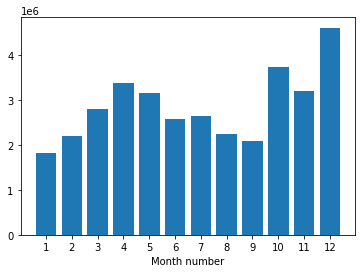

In [94]:
months = range(1,13)
plt.bar(months, results['sales'])
plt.xlabel('Month number')
plt.xticks(months)


In [93]:
px.bar(results,y='sales',x=months,color=months)

###Q2: which city has highest no of sales?

In [107]:
results_cityWise = all_data.groupby('city').sum()
results_cityWise

,Quantity Ordered,Price Each,Month,sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471892e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


([<matplotlib.axis.XTick at 0x7f15a4c66850>,
 <a list of 10 Text major ticklabel objects>)

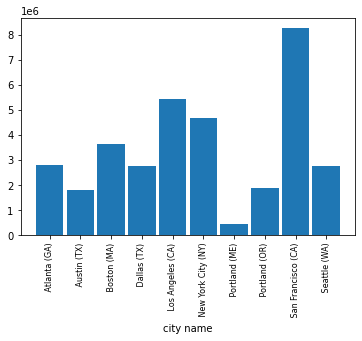

In [119]:
plt.bar(city_name, results_cityWise['sales'],width=0.9)
plt.xlabel('city name')
plt.xticks(city_name,rotation='vertical',size=8)

In [118]:
# using plotly
city_name = [city for city, df in all_data.groupby('city')]
px.bar(results_cityWise,y='sales',x=city_name,color=city_name)

##Q3: what time should we display advertisement to maximize the sale ? 

In [120]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Minute
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME),19,34
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA),10,5
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA),20,18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA),10,21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA),18,58


In [126]:
hours = [hour for hour, df in all_data.groupby('Hour')]

In [128]:
results_hour = all_data.groupby('Hour').sum()
results_hour

,Quantity Ordered,Price Each,Month,sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


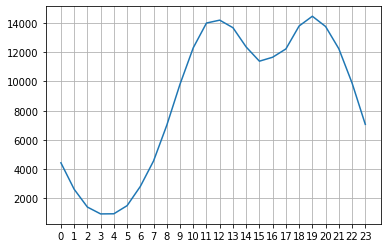

In [143]:
# using matplotlib
plt.plot(hours,results_hour['Quantity Ordered'])
plt.xticks(hours)
plt.grid()

In [144]:
# using plotly
px.line(results_hour, x=hours, y='Quantity Ordered')


#### my recomendetion for is arround 11am or 7pm(19)

## Q4: what are products are most often sold together ?

In [149]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Minute
17,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,700.00,Seattle (WA),12,29
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,11.99,Seattle (WA),12,29
29,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,600.00,San Francisco (CA),7,45
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,11.95,San Francisco (CA),7,45
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",6,11.95,Dallas (TX),11,53


In [152]:
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df =df[['Order ID', 'grouped']].drop_duplicates()

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,grouped
17,209938,"iPhone, Wired Headphones"
29,209949,"Google Phone, USB-C Charging Cable"
41,209960,"USB-C Charging Cable, AA Batteries (4-pack)"
43,209961,"iPhone, Lightning Charging Cable"
147,210064,"Lightning Charging Cable, 27in FHD Monitor"


In [161]:

from itertools import  combinations
from collections import Counter

# most commonly sold items in combination

com = 2

count = Counter()

for row in df['grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,com)))

count.most_common()




[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80),
 ((' Lightning Charging Cable', ' Wired Headphones'), 62),
 (('Lightning Charging Cable', ' USB-C Charging Cable'), 55),
 (('Lightning Charging Cable', ' AA Batteries (4-pack)'), 52),
 (('Lightning Charging Cable', ' Lightning Charging Cable'), 51),
 (('AA Batteries (4-pack)', ' Lightning Charging Cable'), 51),
 ((' USB-C Charging Cable', ' Bose SoundSport Headphones'), 51),
 (('AAA Batteries (4-pack)', ' USB-C Charging Cable'), 50),
 (('AAA Batteries (4-pack)', ' AAA Batteries (4-

## Q5: what product is sold the most & Why ?

In [163]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Minute
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME),19,34
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA),10,5
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA),20,18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA),10,21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA),18,58


In [170]:
product_group = all_data.groupby('Product').sum()
product_group.sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered,Price Each,Month,sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


In [171]:
# using plotly
product_name = [product for product, df in all_data.groupby('Product')]
px.bar(product_group,y='Quantity Ordered',x=product_name,color=product_name)

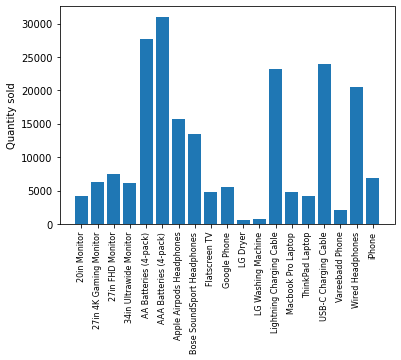

In [178]:
plt.bar(product_name,product_group['Quantity Ordered'])
plt.xticks(product_name, rotation='vertical',size=8)
plt.ylabel("Quantity sold")
plt.show()

In [179]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


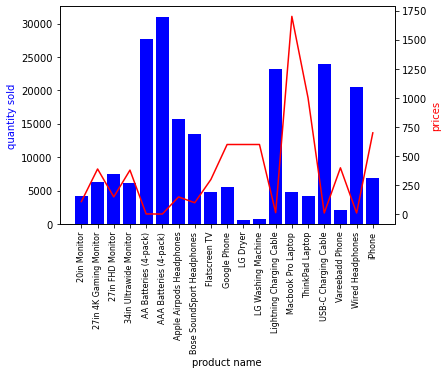

In [193]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_name, product_group['Quantity Ordered'], color='b')
ax2.plot(product_name, prices, 'r-')

ax1.set_xlabel('product name')
ax1.set_ylabel('quantity sold', color='b')
ax2.set_ylabel('prices', color='r')

ax1.set_xticklabels(product_name, rotation='vertical',size=8)

plt.show()





##### For plotly version

In [208]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=product_name, y=product_group['Quantity Ordered'], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=product_name, y=prices, name="yaxis2 data"),
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>Quantity Sold</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>price</b>", secondary_y=True)

fig.show()